In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sympy
import imageio
import os
from typing import Callable


In [2]:
x, y = sympy.symbols('x y')
y = 4*sympy.sin(x)
y

4*sin(x)

In [3]:
# https://math.stackexchange.com/questions/4320251/root-finding-use-newton-method-in-given-interval-or-alternative
roots = []
for x_n in np.linspace(-5, 5, 50):
    for j in range(10):
        x_n -= (
            sympy.lambdify(x, y)(x_n) /
            sympy.lambdify(x, y.diff())(x_n)
        )
    if x_n not in roots:
        roots.append(x_n)
print(roots)


[-9.42477796076938, -15.707963267948966, 3.141592653589793, 9.42477796076938, -3.141592653589793, 0.0, 6.283185307179586, 18.84955592153876, -18.84955592153876, -6.283185307179586, 15.707963267948966]


In [4]:
def setup_integral_fig(x, y, x_vec):
    f = sympy.lambdify(x, y)
    fig, ax = plt.subplots()
    y_lower_bound = f(x_vec).min() - f(x_vec).std()*.25
    y_upper_bound = f(x_vec).max() + f(x_vec).std()*.25
    a, b = int(x_vec.min()), int(x_vec.max())
    ax.set(xlim=(x_vec.min() - 1, x_vec.max() + 1),
           ylim=(np.clip(y_lower_bound, -np.inf, 0),
                 np.clip(y_upper_bound, 0, np.inf)),
           title=r"$\int_{}^{}$".format("{"+str(a)+"}", "{"+str(b)+"}") +
           r"$\left[{}\right]dx$".format(sympy.latex(y))
           )
    sol = sympy.solveset(sympy.Eq(y, 0),
                         domain=sympy.Interval(x_vec.min(),
                                               x_vec.max())
                         )
    print(type(sol))
    if type(sol) == sympy.sets.sets.Union:
        sol = optimize.root_scalar(
            f=sympy.lambdify(x, y),
            x0=1,
            fprime=sympy.lambdify(x, y.diff()),
            method='newton',
            bracket=[x_vec.min(), x_vec.max()]
        ).root
        sol = [x_vec.min()] + [sol] + [x_vec.max()]
        sol = sorted(sol)
        for i in range(len(sol)-1):
            space = np.linspace(sol[i], sol[i+1], 100)
            middle = np.mean(space)
            c = "tab:green" if f(middle) > 0 else "tab:red"
            ax.fill_between(space, f(space), color=c, alpha=.5)
    elif type(sol) == sympy.sets.sets.EmptySet:
        middle = np.mean(x_vec)
        c = "tab:green" if f(middle) > 0 else "tab:red"
        ax.fill_between(x_vec, f(x_vec), color=c, alpha=.5)
    else:
        print(sol)
        sol = [float(s) for s in sol]
        sol = [s for s in sol if (s > x_vec.min() and s < x_vec.max())]
        ax.axhline(0, linestyle="--", color="grey", alpha=.6)
        sol = [x_vec.min()] + sol + [x_vec.max()]
        sol = sorted(sol)
        for i in range(len(sol)-1):
            space = np.linspace(sol[i], sol[i+1], 100)
            middle = np.mean(space)
            c = "tab:green" if f(middle) > 0 else "tab:red"
            ax.fill_between(space, f(space), color=c, alpha=.5)
    return fig, ax


<class 'sympy.sets.sets.FiniteSet'>
{0, -pi, pi}


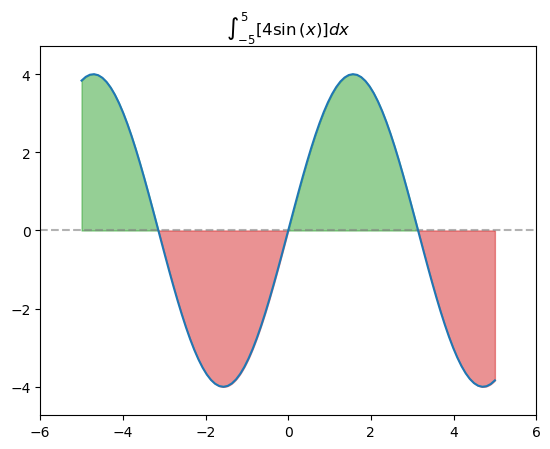

In [5]:

x, y = sympy.symbols('x y')
y = x*(-x**4 + 4*x**3 - 7*x - 10)
y = -1.25*x**2 + 8.5*x - 2.25
y = 4*sympy.sin(x)
x_vec = np.linspace(-5, 5, 100)
fig, ax = setup_integral_fig(x, y, x_vec)

ax.plot(x_vec, sympy.lambdify(x, y)(x_vec))


In [6]:
sympy.solveset(sympy.Eq(y, 0),
               domain=sympy.Interval(-5,
                                     5)
               )


{0, -pi, pi}

In [7]:
roots = np.array(roots)


In [8]:
roots[(roots >= -5) & (roots <= 5)]


array([ 3.14159265, -3.14159265,  0.        ])

In [9]:


def generate_random_expression(degree=np.random.randint(5, 9),
                               max_coefficient=10,
                               trig=True):
    x = sympy.symbols('x')
    coefficients = [
        np.random.randint(-max_coefficient, max_coefficient) for _ in range(degree + 1)]
    polynomial = sum(coeff * x**i for i, coeff in enumerate(coefficients))
    if trig:
        trig_function = np.random.choice(
            [sympy.sin(x), sympy.cos(x), sympy.tan(x)])
    else:
        trig_function = 1
    random_expression = polynomial * trig_function
    random_expression = sympy.simplify(sympy.expand(random_expression))
    return random_expression


y = generate_random_expression()

print("Random Expression:")
print(y)


Random Expression:
(-5*x**6 - 9*x**5 - 3*x**4 - 4*x**3 - 9*x**2 + 6*x - 7)*cos(x)


<class 'sympy.sets.sets.FiniteSet'>
{2*pi, 3*pi, 4*pi, 5*pi, 6*pi, 7*pi, 8*pi, 9*pi, 10*pi, 11*pi, 12*pi, 13*pi, 14*pi, 15*pi, 16*pi, 17*pi, 18*pi, 19*pi}


Text(0.5, 1.0, '$\\int_{5}^{60}$$\\left[\\left(- 6 x^{6} - x^{5} + 3 x^{4} + 5 x^{3} + 5 x^{2} - x - 3\\right) \\tan{\\left(x \\right)}\\right]dx$')

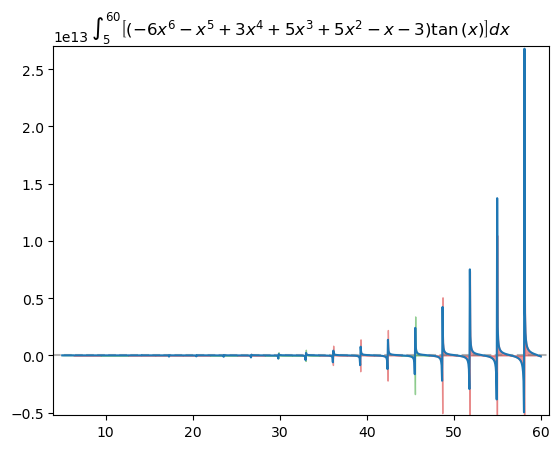

In [11]:
a, b = 5, 60
x_vec = np.linspace(a, b, 1000)
x, y = sympy.symbols('x y')
y = generate_random_expression()
fig, ax = setup_integral_fig(x, y, x_vec)
ax.plot(x_vec, sympy.lambdify(x, y)(x_vec))
ax.set_title(r"$\int_{}^{}$".format("{"+str(a)+"}", "{"+str(b)+"}") +
             r"$\left[{}\right]dx$".format(sympy.latex(y))
             )
